In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
data_path ="https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv"
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.head()

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907
2,0.418,2013.507,82.748964
3,8.193,1420.607,84.760494
4,5.210,951.957,54.588671


In [6]:
import plotly.express as px

In [7]:
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price',color='Price')

In [8]:
X = df[['Mendacium','Depth']]
y = df['Price']

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.2, random_state=1)

In [11]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
model.score(xtest,ytest) * 100

95.36364848622834

In [13]:
df['Pred'] = model.predict(X)

In [14]:
df.head()

,Mendacium,Depth,Price,Pred
0,3.359,1722.533,74.048691,74.790676
1,1.348,2062.571,83.321907,85.064876
2,0.418,2013.507,82.748964,89.255916
3,8.193,1420.607,84.760494,80.438464
4,5.210,951.957,54.588671,55.067577


In [15]:
px.scatter_3d(df,x='Mendacium',y='Depth',z='Pred',color='Pred')

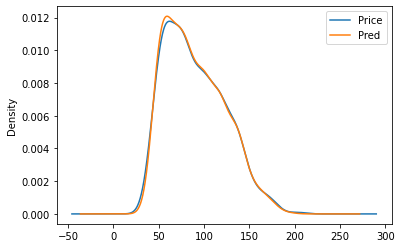

In [16]:
df.Price.plot(kind='kde',)
df.Pred.plot(kind='kde')
plt.legend()
plt.show()